<a href="https://colab.research.google.com/github/jeansilvagithub/calculadora_python/blob/main/conversas_zap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
#from datetime 
import datetime
import calendar
import re
import urllib3
from pathlib import Path
from collections import Counter
import collections
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [220]:
ref_arquivo = open('/content/drive/MyDrive/grupo_rosa_zap.txt', "r", encoding='utf-8')
grupo_rosa_zap = ref_arquivo.read()

In [264]:
print(grupo_rosa_zap)

13/4/21 20:46:35 Grupo Rosa Matias: ‎Los mensajes y las llamadas están cifrados de extremo a extremo. Nadie fuera de este chat, ni siquiera WhatsApp, puede leerlos ni escucharlos.
13/4/21 20:46:35 ‎Laisla Souza creó este grupo
13/4/21 20:47:40 ‎Laisla Souza te añadió
13/4/21 20:49:53 ‎Laisla Souza añadió a ‎‎Alexandre Tostes, Igor Gonçalves, y Rosane Ananias
13/4/21 20:50:23 Rosane Ananias: Grupo Rosa Matias
13/4/21 20:50:35 ‎Rosane Ananias cambió el asunto a “Grupo Rosa Matias”
13/4/21 20:50:36 ‎Laisla Souza añadió a Josue Lopes
13/4/21 20:50:46 ‎Ahora eres admin. del grupo
13/4/21 20:50:58 Laisla Souza: Todos?
‎13/4/21 20:51:01 Igor Gonçalves: ‎sticker omitido
13/4/21 20:51:03 Rosane Ananias: Presrnte
13/4/21 20:51:10 Laisla Souza: Okaaaay
13/4/21 20:51:30 Jean Silva: 👊🏿
13/4/21 20:52:00 Alexandre Tostes: ✌🏾👍🏾
13/4/21 20:53:06 Mirella Eloize: Yeah
13/4/21 20:53:55 ‎Andrey Oliveira cambió el ícono de este grupo
13/4/21 20:54:12 Andrey Oliveira: tentei pegar um diferente dos que já tem

In [263]:
datas = re.split(r'(\d{2}/\d{1}/\d{2} \d{2}:\d{2}:\d{2}) ', grupo_rosa_zap)[1:]

In [250]:
semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

conversas = []
for i in range(0, len(datas), 2):
  data = datas[i]
  mensagem = datas[i+1]
  partes_mensagem = mensagem.split(': ', 1)
  if len(partes_mensagem) > 1:
    data = datetime.datetime.strptime(data, '%d/%m/%y %H:%M:%S')
    conversas.append([data, partes_mensagem[0], partes_mensagem[1].strip(), data.weekday(), semana[data.weekday()], data.hour])

In [248]:
pessoas = 0
for mensagem in mensagens:
  if mensagem[1] == 'Jean Silva':
    pessoas += 1
pessoas

180

In [251]:
df = pd.DataFrame(conversas, columns=['data', 'pessoa', 'mensagem', 'dia_semana', 'dia_semana_extenso', 'hora'])
df

,data,pessoa,mensagem,dia_semana,dia_semana_extenso,hora
0,2021-04-13 20:46:35,Grupo Rosa Matias,‎Los mensajes y las llamadas están cifrados de...,1,Terça,20
1,2021-04-13 20:50:23,Rosane Ananias,Grupo Rosa Matias,1,Terça,20
2,2021-04-13 20:50:58,Laisla Souza,Todos?\n‎,1,Terça,20
3,2021-04-13 20:51:01,Igor Gonçalves,‎sticker omitido,1,Terça,20
4,2021-04-13 20:51:03,Rosane Ananias,Presrnte,1,Terça,20
...,...,...,...,...,...,...
6174,2021-06-12 12:15:27,Alexandre Tostes,‎imagen omitida,5,Sábado,12
6175,2021-06-12 12:15:28,Andrey Oliveira,tô olhando aqui,5,Sábado,12
6176,2021-06-12 12:16:23,Rosane Ananias,Exato,5,Sábado,12
6177,2021-06-12 12:22:24,Alexandre Tostes,Tirei pq a empresa pediu e tal...mas no dia a ...,5,Sábado,12


In [252]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

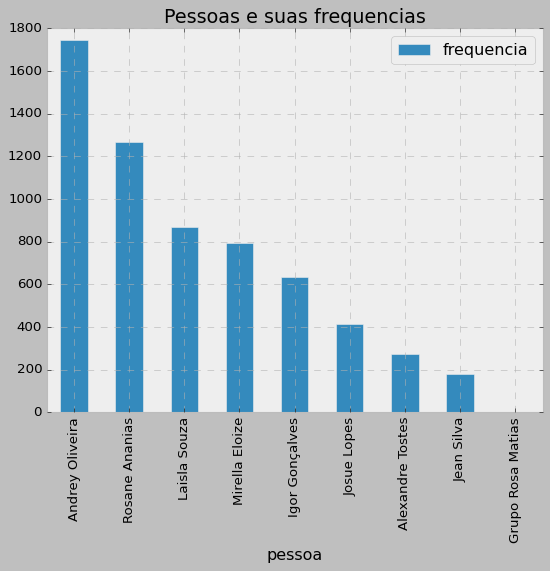

In [239]:
df_conversas = df.groupby(['pessoa']).size().reset_index(name='frequencia')
df_conversas = df_conversas.sort_values(by=['frequencia'], ascending=False)
df_conversas.plot(kind='bar', x = 'pessoa', y='frequencia', title='Pessoas e suas frequencias')

In [257]:
palavras_ditas = []
stopped_words = ['com', 'para', 'não', 'n', 'de', 'do', 'da', 'das', 'dos', 'q',
                 'que', 'a', 'já', 'as', 'e', 'ele', 'eu', 'em', 'é', 'i', 'o', 'os', 'um', 'uma', '-', 'mas', 'no',
                 'nos', 'na', 'nas', 'nós', 'pra', 'só', 'se', 'tem', 'vou', 'mais', 'por', 'se', "=", "acho", "mesmo", "isso", "fazer", "omitida"]

for mensagem in mensagens:
  mensagem = mensagem[2]
  for palavra in re.split(r'[,.!? \n<>()]+', mensagem.lower()):
    if palavra and palavra not in stopped_words:
      palavras_ditas.append(palavra)

freq_palavras = Counter(palavras_ditas)

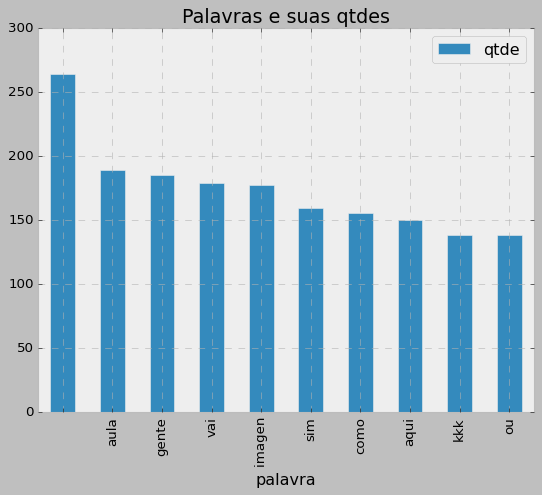

In [258]:
df_freq_palavras = pd.DataFrame(freq_palavras.items(), columns=['palavra', 'qtde'])
df_freq_palavras = df_freq_palavras.sort_values(by=['qtde'], ascending=False)
top_palavras = df_freq_palavras[:10]
top_palavras.plot(kind='bar', x='palavra', y='qtde', title='Palavras e suas qtdes')

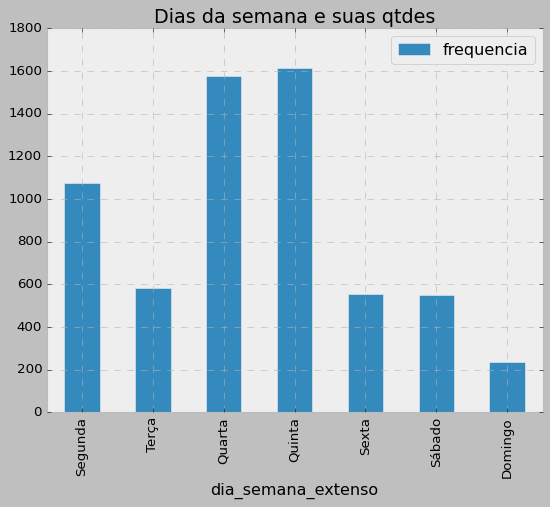

In [259]:
df_diaSemana = df[['dia_semana', 'dia_semana_extenso']].groupby(['dia_semana', 'dia_semana_extenso']).size().reset_index(name='frequencia')
df_diaSemana.plot(kind='bar', x='dia_semana_extenso', y='frequencia', title='Dias da semana e suas qtdes')

In [ ]:
df_hora = df[['hora']]
df_hora['qtde'] = 1

df_hora_zero = pd.DataFrame([[i, 0] for i in range(0, 24)], columns=df_hora.columns)

df_hora_fix = pd.concat([df_hora, df_hora_zero])
df_hora_fix

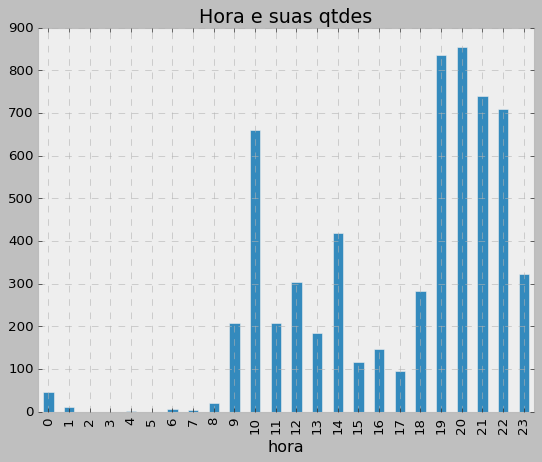

In [262]:
df_hora_2 = df_hora_fix.groupby(['hora'])['qtde'].sum()
df_hora_2.plot(kind='bar', x='hora', y='frequencia', title='Hora e suas qtdes')